# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [6]:
url = url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
query_url = url + "appid=" + weather_api_key + "&q=" +city
query_url


'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0465f0c7d6b1a8370e0df34ffc65c5b6appid=0465f0c7d6b1a8370e0df34ffc65c5b6&q=bubaque'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
temp_max = []
lat = []
long = []
city_name = []
humidity = []
clouds = []
wind = []
country_name = []
date_name = []
print("Beginning Data Retrieval")
print("------------------------")


for index, city in enumerate(cities):
    
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        long.append(city_data['coord']['lon'])
        temp_max.append(city_data['main']['temp_max'])
        humidity.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])
        country_name.append(city_data['sys']['country'])
        date_name.append(city_data['dt'])
    
        record_no = index % 50 + 1
        set_no = index // 50 + 1
        print(f"Processing Record {record_no} of set {set_no} | {city}")
    
    except KeyError:
    
        if city not in cities:
          print("City not found. Skipping........")
          
          
          
          


Beginning Data Retrieval
------------------------
Processing Record 1 of set 1 | severo-kurilsk
Processing Record 2 of set 1 | cape town
Processing Record 3 of set 1 | kodiak
Processing Record 4 of set 1 | luhyny
Processing Record 5 of set 1 | grand gaube
Processing Record 6 of set 1 | chickasha
Processing Record 7 of set 1 | ushuaia
Processing Record 8 of set 1 | nabire
Processing Record 10 of set 1 | vestmannaeyjar
Processing Record 11 of set 1 | new norfolk
Processing Record 12 of set 1 | atbasar
Processing Record 13 of set 1 | hobart
Processing Record 14 of set 1 | egvekinot
Processing Record 15 of set 1 | rikitea
Processing Record 16 of set 1 | yellowknife
Processing Record 17 of set 1 | carnarvon
Processing Record 18 of set 1 | laguna
Processing Record 19 of set 1 | samarai
Processing Record 20 of set 1 | airai
Processing Record 21 of set 1 | jinxiang
Processing Record 22 of set 1 | bluff
Processing Record 23 of set 1 | nanortalik
Processing Record 24 of set 1 | hermanus
Processi

Processing Record 18 of set 5 | krosno
Processing Record 19 of set 5 | harlingen
Processing Record 20 of set 5 | skjervoy
Processing Record 21 of set 5 | batsfjord
Processing Record 22 of set 5 | port lincoln
Processing Record 23 of set 5 | codrington
Processing Record 24 of set 5 | port augusta
Processing Record 25 of set 5 | kununurra
Processing Record 26 of set 5 | klaeng
Processing Record 27 of set 5 | pochutla
Processing Record 29 of set 5 | ostersund
Processing Record 30 of set 5 | upernavik
Processing Record 31 of set 5 | lundazi
Processing Record 32 of set 5 | zhireken
Processing Record 33 of set 5 | darlowo
Processing Record 34 of set 5 | nishihara
Processing Record 35 of set 5 | salantai
Processing Record 36 of set 5 | qaanaaq
Processing Record 37 of set 5 | kahului
Processing Record 38 of set 5 | kapaa
Processing Record 39 of set 5 | adrar
Processing Record 41 of set 5 | santa maria
Processing Record 42 of set 5 | waipawa
Processing Record 43 of set 5 | sicuani
Processing Re

Processing Record 33 of set 9 | kudahuvadhoo
Processing Record 34 of set 9 | nampula
Processing Record 35 of set 9 | novoorsk
Processing Record 36 of set 9 | san luis rio colorado
Processing Record 37 of set 9 | baykit
Processing Record 38 of set 9 | mercedes
Processing Record 39 of set 9 | ikom
Processing Record 40 of set 9 | champerico
Processing Record 41 of set 9 | nouadhibou
Processing Record 42 of set 9 | naberera
Processing Record 43 of set 9 | amalapuram
Processing Record 44 of set 9 | xuddur
Processing Record 46 of set 9 | yangambi
Processing Record 47 of set 9 | borovoy
Processing Record 49 of set 9 | brainerd
Processing Record 1 of set 10 | liverpool
Processing Record 2 of set 10 | akhtanizovskaya
Processing Record 3 of set 10 | christchurch
Processing Record 4 of set 10 | bandar-e anzali
Processing Record 7 of set 10 | plomarion
Processing Record 8 of set 10 | ambilobe
Processing Record 9 of set 10 | isangel
Processing Record 10 of set 10 | mut
Processing Record 11 of set 1

In [8]:
city_data

{'coord': {'lon': -15.8333, 'lat': 11.2833},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 76.37,
  'feels_like': 73.6,
  'temp_min': 76.37,
  'temp_max': 76.37,
  'pressure': 1010,
  'humidity': 65,
  'sea_level': 1010,
  'grnd_level': 1007},
 'visibility': 10000,
 'wind': {'speed': 13.33, 'deg': 314},
 'clouds': {'all': 57},
 'dt': 1613020618,
 'sys': {'country': 'GW', 'sunrise': 1613028331, 'sunset': 1613070588},
 'timezone': 0,
 'id': 2374583,
 'name': 'Bubaque',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Create a dataframe with required items
city_df = pd.DataFrame({"City": city_name,
                            "Latitude": lat,
                            "Longitude": long,
                            "Max Temperature": temp_max,
                            "Humidity": humidity,
                            "Cloudiness": clouds,
                            "Wind Speed": wind,
                            "Country": country_name, 
                            "Date": date_name})


# Save city_df as csv
city_df.to_csv(r'/Users\Armand The Great\Documents\python-api-challenge\WeatherPy\cityinfo.csv')
df = pd.read_csv('cityinfo.csv')
df

,Unnamed: 0,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Severo-Kuril'sk,50.6789,156.1250,27.25,97,100,23.33,RU,1613020362
1,1,Cape Town,-33.9258,18.4232,68.00,88,0,11.50,ZA,1613020452
2,2,Saint Paul Harbor,57.7900,-152.4072,37.40,70,90,39.12,US,1613020193
3,3,Luhyny,51.0820,28.4006,14.23,96,98,8.28,UA,1613020457
4,4,Grand Gaube,-20.0064,57.6608,84.00,65,50,8.01,MU,1613020457
...,...,...,...,...,...,...,...,...,...,...
554,554,São Filipe,14.8961,-24.4956,70.72,73,32,10.94,CV,1613020399
555,555,Grand-Santi,4.2500,-54.3833,71.08,93,92,2.17,GF,1613020617
556,556,Meulaboh,4.1363,96.1285,86.72,64,91,2.75,ID,1613020617
557,557,Uchiza,-8.4592,-76.4633,71.73,84,100,1.52,PE,1613020617


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.


Index_label = city_df[city_df['Humidity']>100].index.tolist()
print(Index_label)


[]


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<Figure size 648x432 with 0 Axes>

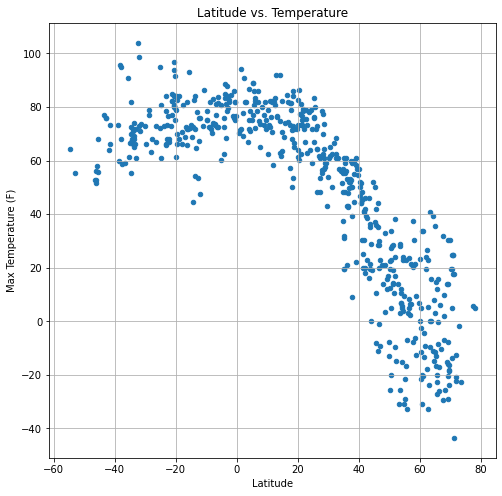

In [12]:


# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
df.plot(kind="scatter", x="Latitude", y="Max Temperature", grid=True, figsize=(8,8),
              title="Latitude vs. Temperature")

#Axis Labeling
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


plt.show()


## Latitude vs. Humidity Plot

<Figure size 648x432 with 0 Axes>

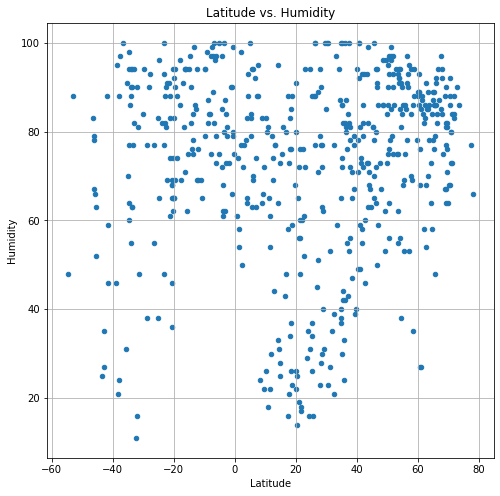

In [13]:


# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the humidity
df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8),
              title="Latitude vs. Humidity")

#Axis Labeling
plt.xlabel("Latitude")
plt.ylabel("Humidity")


plt.show()

## Latitude vs. Cloudiness Plot

<Figure size 648x432 with 0 Axes>

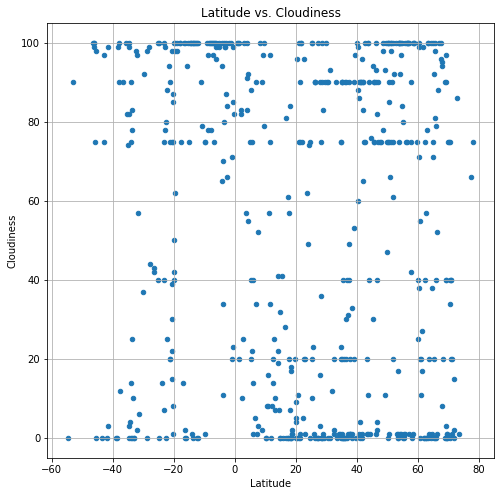

In [14]:


# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
df.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, figsize=(8,8),
              title="Latitude vs. Cloudiness")

#Axis Labeling
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


plt.show()

## Latitude vs. Wind Speed Plot

<Figure size 648x432 with 0 Axes>

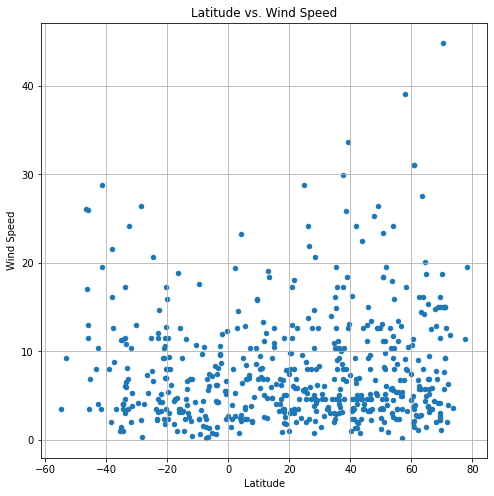

In [15]:


# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
df.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True, figsize=(8,8),
              title="Latitude vs. Wind Speed")

#Axis Labeling
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


plt.show()

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames

hemi_north = df.Latitude >= 0
hemi_south = df.Latitude < 0

# Create the north and south hemisphere dataframes using boolean indexing from the criteria from above 
north_weather = df[hemi_north]
south_weather = df[hemi_south]


north_weather = north_weather.reset_index(drop=True)
south_weather = south_weather.reset_index(drop=True)
north_weather.head()

,Unnamed: 0,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Severo-Kuril'sk,50.6789,156.1250,27.25,97,100,23.33,RU,1613020362
1,2,Saint Paul Harbor,57.7900,-152.4072,37.40,70,90,39.12,US,1613020193
2,3,Luhyny,51.0820,28.4006,14.23,96,98,8.28,UA,1613020457
3,5,Chickasha,35.0526,-97.9364,19.40,86,90,16.11,US,1613020457
4,8,Vestmannaeyjar,63.4427,-20.2734,40.73,70,100,27.51,IS,1613020458


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7710011775162048


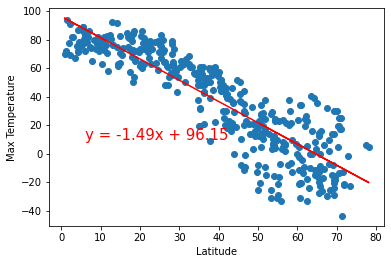

In [17]:
x_values = north_weather['Latitude']
y_values = north_weather['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.10832879813184433


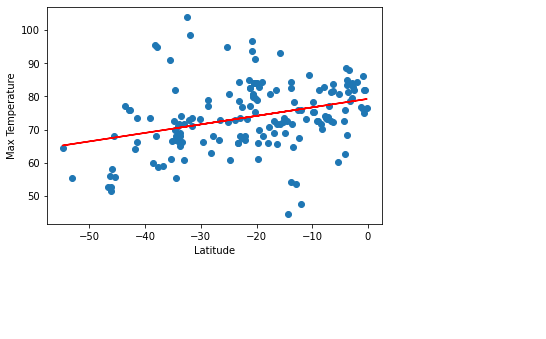

In [18]:
x_values = south_weather['Latitude']
y_values = south_weather['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10149932966511067


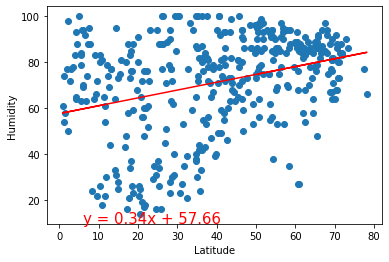

In [19]:
x_values = north_weather['Latitude']
y_values = north_weather['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10783179327194285


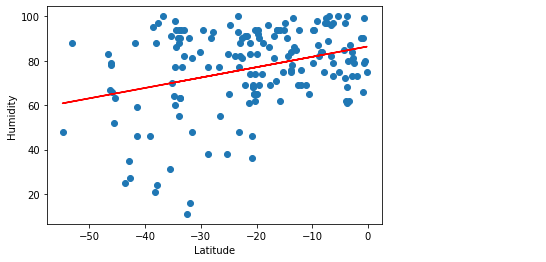

In [20]:
x_values = south_weather['Latitude']
y_values = south_weather['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009623484004879482


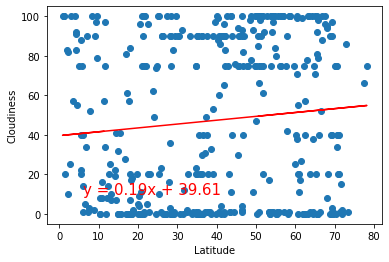

In [21]:
x_values = north_weather['Latitude']
y_values = north_weather['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05885753904489143


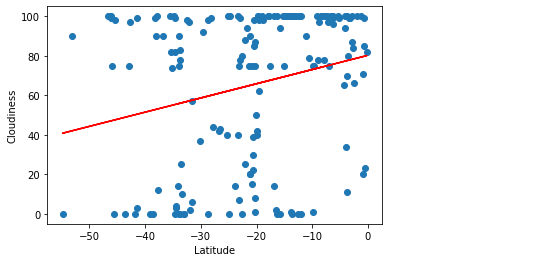

In [22]:
x_values = south_weather['Latitude']
y_values = south_weather['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011266889065935823


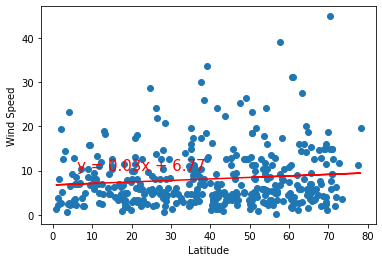

In [23]:
x_values = north_weather['Latitude']
y_values = north_weather['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09043793745238247


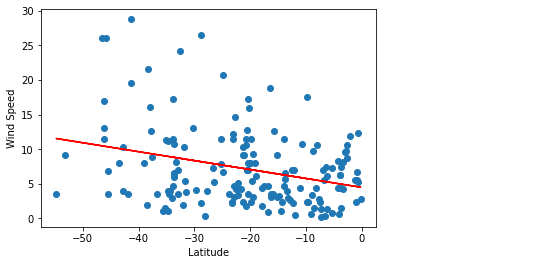

In [24]:
x_values = south_weather['Latitude']
y_values = south_weather['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()